In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = pd.read_csv("Fraud_check.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data.shape

(600, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
data1=data.copy()
data1['taxable_category'] = pd.cut(x = data1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [9]:
data1.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

In [10]:
data1['Undergrad'].replace(['NO', 'YES'],[0, 1], inplace=True)
data1['Marital.Status'].replace(['Divorced', 'Married', 'Single'],[0, 1, 2], inplace=True)
data1['Urban'].replace(['NO', 'YES'],[0, 1], inplace=True)
data1['taxable_category'].replace(['Good', 'Risky'],[0, 1], inplace=True)
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [11]:
x = data1.drop('taxable_category',axis=1)
y = data1['taxable_category']

In [12]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40) 

In [13]:
num_trees = 100
max_features = 5
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()) 

0.9983333333333333


In [14]:
model.fit(x_train, y_train)

RandomForestClassifier(max_features=5)

In [15]:
model.feature_importances_

array([7.45759017e-04, 0.00000000e+00, 9.96513603e-01, 2.17535278e-03,
       5.42924475e-04, 2.23605162e-05])

In [16]:
y_pred_100 = model.predict(x_test)

In [17]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 1.0000


In [18]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Taxable.Income     0.996514
City.Population    0.002175
Undergrad          0.000746
Work.Experience    0.000543
Urban              0.000022
Marital.Status     0.000000
dtype: float64

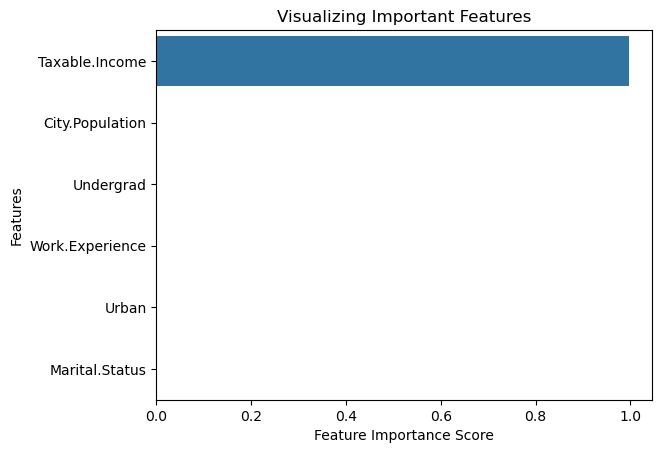

In [19]:
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# Bagging Model

In [24]:
kfold = KFold(n_splits=10, random_state=42,shuffle = True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean()) 

0.9983333333333333


# AdaBoost Classification

In [26]:
num_trees = 10
seed=42
kfold = KFold(n_splits=10, random_state=seed, shuffle = True )
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.9983333333333333
